In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('team_scores.csv')
names = df["name"].unique().tolist()

In [21]:
def global_mean():
        evaluations = {}
        for name in names:
            team_member = df[df['name'] == name]
            team_member_tw_mean = team_member['team_work'].mean()
            team_member_hs_mean = team_member['hard_skill'].mean()

            evaluations[name] = {
                'team_work': float(team_member_tw_mean),
                'hard_skill': float(team_member_hs_mean)
            }

        return evaluations

In [22]:
def get_data(option):
        evaluation_data = {}
        for name in names:
            name_evolution = df[df['name'] == name][option].to_list()
            evaluation_data[name] = name_evolution
        return evaluation_data

In [23]:
global_tw_mean = df['team_work'].mean()

In [24]:
global_hs_mean = df['hard_skill'].mean()

In [25]:
global_mean_data = global_mean()

In [28]:
all_over_mean = {nombre: info for nombre, info in global_mean_data.items() if info['team_work'] > global_tw_mean and info['hard_skill'] > global_hs_mean}
all_over_mean

{'Juan': {'team_work': 9.8, 'hard_skill': 9.4},
 'Maria': {'team_work': 9.6, 'hard_skill': 9.6},
 'Carlos': {'team_work': 6.8, 'hard_skill': 6.8}}

In [31]:
hs_over_mean = {nombre: info['hard_skill'] for nombre, info in global_mean_data.items() if info['hard_skill'] > global_hs_mean }
hs_under_mean = {nombre: info['hard_skill'] for nombre, info in global_mean_data.items() if info['hard_skill'] < global_hs_mean }
print(hs_over_mean, hs_under_mean)

{'Juan': 9.4, 'Maria': 9.6, 'Carlos': 6.8, 'Ana': 6.2, 'Carmen': 8.8} {'Pedro': 3.8, 'Luisa': 4.4, 'Jorge': 4.6, 'Sofia': 2.8, 'Diego': 2.6, 'Camila': 0.6}


In [1]:
calificaciones = [4, 5, 6, 6, 7, 7, 7, 7]

In [35]:
import numpy as np
from scipy.stats import linregress

# Lista de calificaciones
calificaciones = [4, 5, 6, 6, 7, 7, 7, 7]

# 1. Cambio absoluto (último - primero)
cambio_absoluto = calificaciones[-1] - calificaciones[0]

# 2. Cambio en promedio (segunda mitad - primera mitad)
mitad = len(calificaciones) // 2
promedio_primera_mitad = sum(calificaciones[:mitad]) / mitad
promedio_segunda_mitad = sum(calificaciones[mitad:]) / (len(calificaciones) - mitad)

cambio_promedio = promedio_segunda_mitad - promedio_primera_mitad

# 3. Tasa de crecimiento promedio
tasas_de_crecimiento = [(calificaciones[i + 1] - calificaciones[i]) for i in range(len(calificaciones) - 1)]
tasa_crecimiento_promedio = np.mean(tasas_de_crecimiento)

# 4. Pendiente de una regresión lineal
x = np.arange(len(calificaciones))  # Índices (0, 1, 2, ..., n)
slope, intercept, r_value, p_value, std_err = linregress(x, calificaciones)

# Mostrar resultados numéricos
print(f"Cambio absoluto (último - primero): {cambio_absoluto}")
print(f"Cambio en promedio (segunda mitad - primera mitad): {cambio_promedio}")
print(f"Tasa de crecimiento promedio: {tasa_crecimiento_promedio}")
print(f"Pendiente de la regresión lineal: {slope}")

Cambio absoluto (último - primero): 3
Cambio en promedio (segunda mitad - primera mitad): 1.75
Tasa de crecimiento promedio: 0.42857142857142855
Pendiente de la regresión lineal: 0.4166666666666667


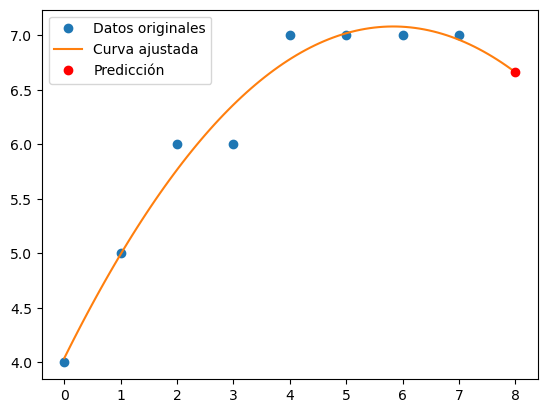

Predicción del próximo resultado con regresión polinomial: 6.66


In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Lista de calificaciones
calificaciones = [4, 5, 6, 6, 7, 7, 7, 7]

# Índices de las evaluaciones
x = np.arange(len(calificaciones))

# Ajuste de un polinomio de grado 2
polinomio = np.polyfit(x, calificaciones, 2)
p = np.poly1d(polinomio)

# Predicción del próximo valor
proximo_indice = len(calificaciones)
proximo_resultado = p(proximo_indice)

# Visualización de la curva ajustada
xp = np.linspace(0, proximo_indice, 100)
plt.plot(x, calificaciones, 'o', label="Datos originales")
plt.plot(xp, p(xp), '-', label="Curva ajustada")
plt.plot(proximo_indice, proximo_resultado, 'ro', label="Predicción")
plt.legend()
plt.show()

# Resultado de la predicción
print(f"Predicción del próximo resultado con regresión polinomial: {proximo_resultado:.2f}")


In [37]:
!pip install prophet

   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
    --------------------------------------- 0.2/13.3 MB 3.7 MB/s eta 0:00:04
   --- ------------------------------------ 1.1/13.3 MB 12.0 MB/s eta 0:00:02
   -------- ------------------------------- 2.9/13.3 MB 20.9 MB/s eta 0:00:01
   -------------- ------------------------- 4.8/13.3 MB 25.4 MB/s eta 0:00:01
   ------------------- -------------------- 6.6/13.3 MB 28.0 MB/s eta 0:00:01
   ------------------------- -------------- 8.4/13.3 MB 29.7 MB/s eta 0:00:01
   ----------------------------- ---------- 9.8/13.3 MB 29.8 MB/s eta 0:00:01
   -------------------------------- ------- 10.9/13.3 MB 34.4 MB/s eta 0:00:01
   ---------------------------------------  13.3/13.3 MB 36.3 MB/s eta 0:00:01
   ---------------------------------------- 13.3/13.3 MB 34.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/94.5 kB ? eta -:--:--
   ---------------------------------------- 94.5/94.5 kB ? eta 0:00:00
   ----

23:05:00 - cmdstanpy - INFO - Chain [1] start processing
23:05:00 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\manu\Desktop\septeamsV2\venv\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


Predicción del próximo resultado: 8.00


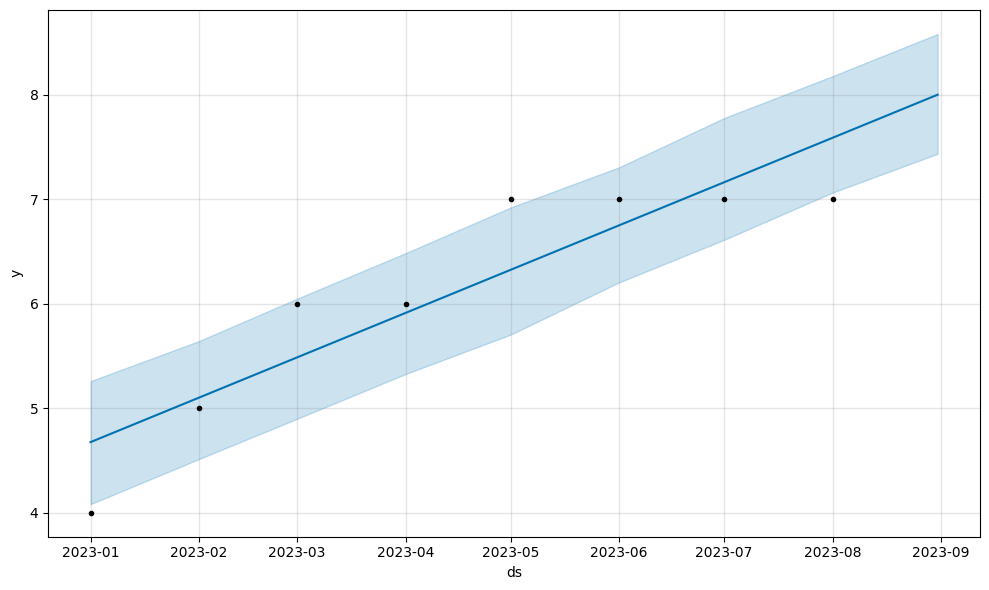

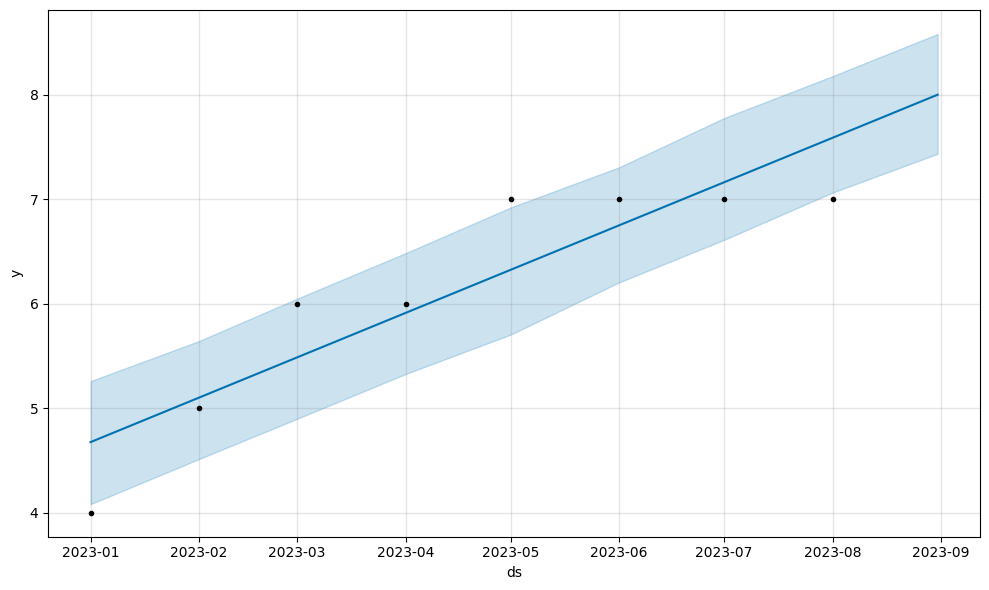

In [3]:
from prophet import Prophet
import pandas as pd

# Suponemos que tienes una lista de evaluaciones de un empleado con sus fechas
data = {
    "ds": ["2023-01-01", "2023-02-01", "2023-03-01", "2023-04-01", "2023-05-01", "2023-06-01", "2023-07-01", "2023-08-01"],
    "y": [4, 5, 6, 6, 7, 7, 7, 7]
}

# Convertir los datos a un DataFrame de pandas
df = pd.DataFrame(data)

# Inicializar el modelo Prophet
modelo = Prophet()

# Entrenar el modelo con los datos de evaluaciones
modelo.fit(df)

# Hacer una predicción para el próximo mes
futuro = modelo.make_future_dataframe(periods=1, freq='M')  # Predecir el próximo valor
prediccion = modelo.predict(futuro)

# Mostrar la predicción para el próximo resultado
proximo_valor = prediccion[['ds', 'yhat']].iloc[-1]  # Último valor predicho
print(f"Predicción del próximo resultado: {proximo_valor['yhat']:.2f}")

# Visualización de las predicciones y tendencia
modelo.plot(prediccion)

In [1]:
import pandas as pd
from prophet import Prophet

# Datos originales
data = {
    "ds": ["2023-01-01", "2023-02-01", "2023-03-01", "2023-04-01", "2023-05-01", "2023-06-01", "2023-07-01", "2023-08-01"],
    "y": [4, 5, 6, 6, 7, 7, 7, 7]
}
df = pd.DataFrame(data)

# Normalizar los valores de las calificaciones (dividir por el máximo)
max_valor = 10
df['y_normalized'] = df['y'] / max_valor

# Entrenar Prophet con los valores normalizados
modelo = Prophet()
modelo.fit(df[['ds', 'y_normalized']].rename(columns={'y_normalized': 'y'}))

# Predecir el próximo valor
futuro = modelo.make_future_dataframe(periods=1, freq='ME')
prediccion = modelo.predict(futuro)

# Desnormalizar el valor predicho (volver al rango original)
proximo_valor_normalizado = prediccion['yhat'].iloc[-1]
proximo_valor = proximo_valor_normalizado * max_valor

# Limitar el valor entre 0 y 10
proximo_valor_ajustado = max(0, min(proximo_valor, 10))

# Mostrar la predicción ajustada
print(f"Predicción del próximo resultado ajustada: {proximo_valor_ajustado:.2f}")

c:\Users\manu\Desktop\septeamsV2\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
09:22:01 - cmdstanpy - INFO - Chain [1] start processing
09:22:01 - cmdstanpy - INFO - Chain [1] done processing


Predicción del próximo resultado ajustada: 8.00


In [11]:
def last_survey():
        evaluations = {}
        last = df["date"].max()
        last_survey = df[df["date"] == last]
        
        for name in names:
            team_member = last_survey[last_survey['name'] == name]
            
            # Comprobar si existen datos para el miembro del equipo (HAY que implementar limpieza de datos antes en el futuro)
            if not team_member.empty:
                team_member_tw = team_member['team_work'].values[0]
                team_member_hs = team_member['hard_skill'].values[0]
            else:
                
                team_member_tw = None
                team_member_hs = None

            evaluations[name] = {
                'team_work': float(team_member_tw),
                'hard_skill': float(team_member_hs)
            }

        return evaluations

print(last_survey())

{'Juan': {'team_work': 10.0, 'hard_skill': 9.0}, 'Maria': {'team_work': 10.0, 'hard_skill': 9.0}, 'Pedro': {'team_work': 10.0, 'hard_skill': 6.0}, 'Luisa': {'team_work': 10.0, 'hard_skill': 5.0}, 'Carlos': {'team_work': 7.0, 'hard_skill': 7.0}, 'Ana': {'team_work': 7.0, 'hard_skill': 6.0}, 'Jorge': {'team_work': 9.0, 'hard_skill': 4.0}, 'Sofia': {'team_work': 4.0, 'hard_skill': 2.0}, 'Diego': {'team_work': 7.0, 'hard_skill': 6.0}, 'Carmen': {'team_work': 4.0, 'hard_skill': 9.0}, 'Camila': {'team_work': 2.0, 'hard_skill': 0.0}}
